<a href="https://colab.research.google.com/github/DarkWorldCoder/LearningAI/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import pandas as pd

labels_csv = pd.read_csv("drive/My Drive/dog-breed-identification/labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: >

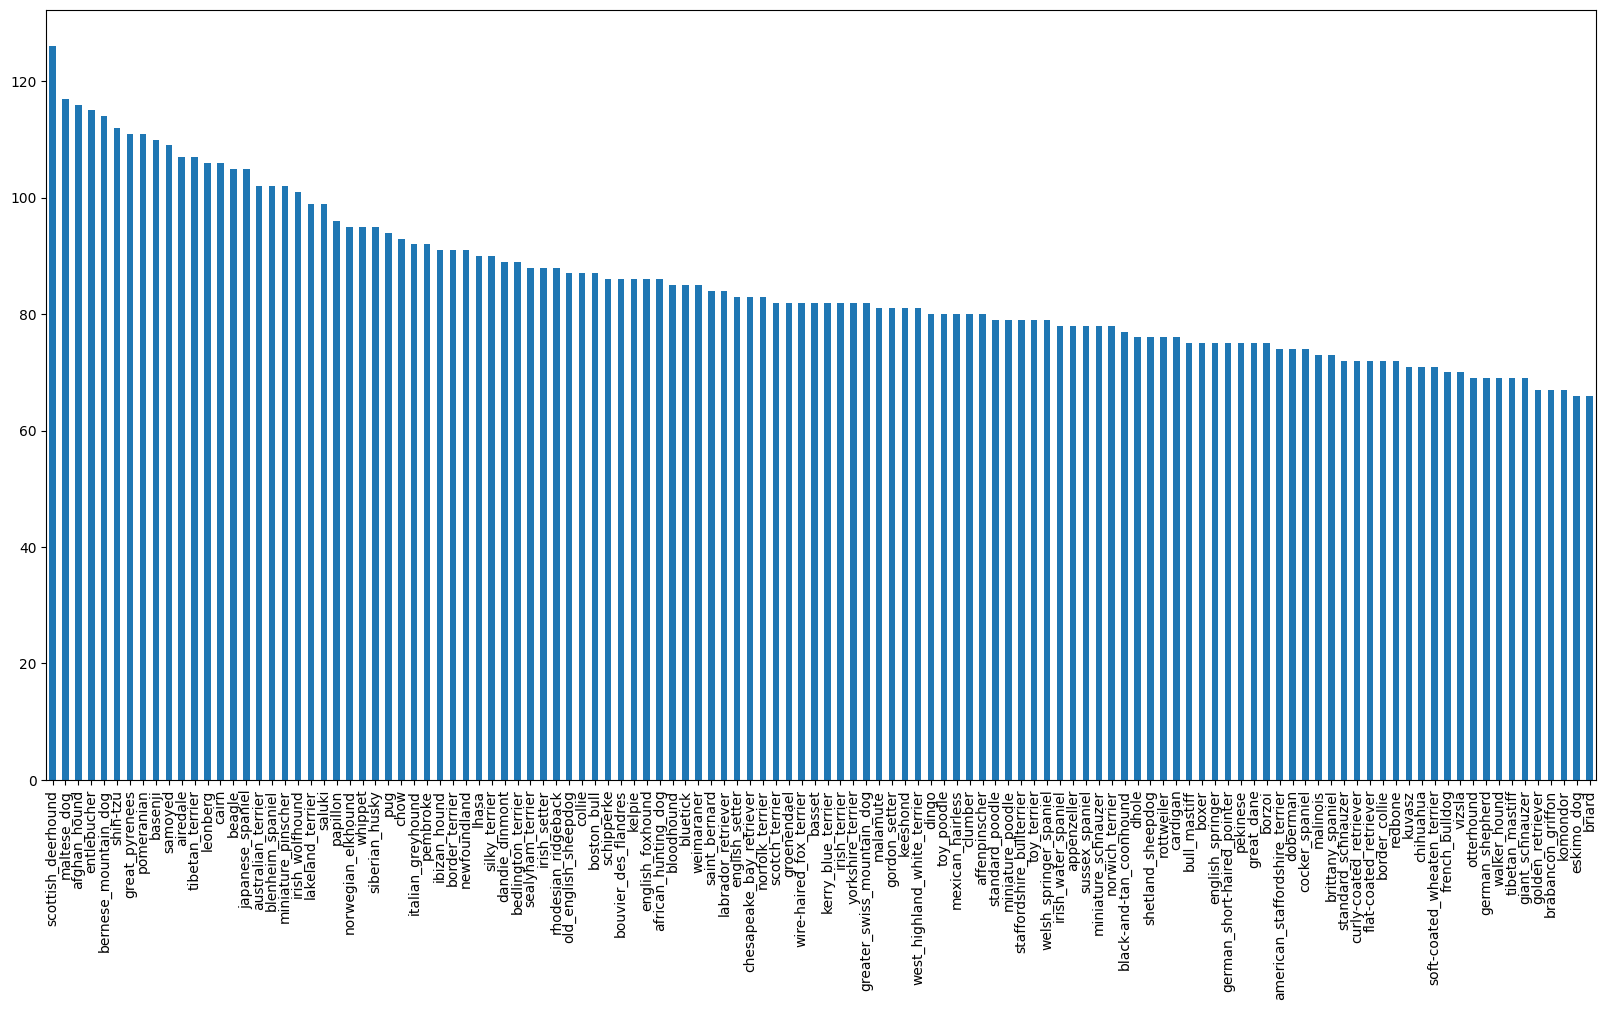

In [4]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))


In [5]:
from IPython.display import Image

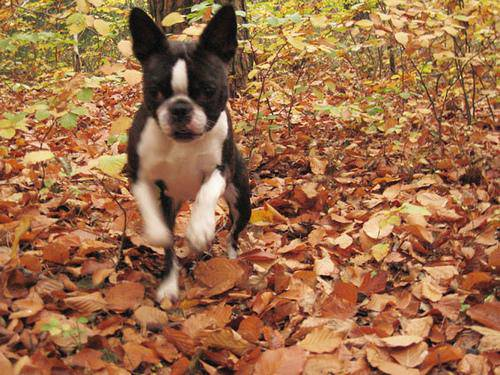

In [6]:
Image("drive/My Drive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [26]:
filenames = ["drive/My Drive/dog-breed-identification/train/"+fname+".jpg" for fname in labels_csv["id"]]


In [27]:
filenames

['drive/My Drive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/dog-breed-identification/t

In [28]:
filenames[:10]

['drive/My Drive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [29]:
import os
os.listdir("drive/My Drive/dog-breed-identification/train/")[:10]


['de8095b35aec0e2a0d07ed11feb11a28.jpg',
 'de51f05ddadfb52e97fbc8799891ea8c.jpg',
 'ddc8d051c9b476c1eef9d35566490e59.jpg',
 'e8d09f74216aeede7e77829e177de7c0.jpg',
 'e07277bc6a6a0da06598b3ad43a011b2.jpg',
 'de37d314715709b183d88ec82184330a.jpg',
 'e7ab74acdc860dfb93271901da085ffd.jpg',
 'de2db91c990838b3951a72ad21988e31.jpg',
 'e5f1d18d03878ce30dc24eb945652698.jpg',
 'e03f2a3e636ea5900f5c57ca7c7af68c.jpg']

In [30]:
import os
if len(os.listdir("drive/My Drive/dog-breed-identification/train/")) == len(filenames):
  print("Filenames match actual amount of files")
else:
  print("Filenames do not match actual amount of files, check the target directory")



Filenames match actual amount of files


In [31]:
labels = labels_csv["breed"].to_numpy()

In [32]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filename")
else:
  print("Number of labels does not matches number of filenames")


Number of labels matches number of filename


In [33]:
import numpy as np

unique_breeds = np.unique(labels)

In [34]:
len(unique_breeds)

120

In [35]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [36]:
np.where(unique_breeds == labels[0])
boolean_labels = [label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [37]:
X = filenames
y= boolean_labels

In [38]:
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step:10}


In [39]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,
                                               random_state=42
                                               )

len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [40]:
#Lets have a geez at training data
X_train[:5],y_train[:2]

(['drive/My Drive/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fals

In [41]:
from matplotlib.pyplot import imread

image = imread(filenames[42])

image.shape

(257, 350, 3)

In [43]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [51]:
IMG_SIZE = 224

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image,channels=3)
  image = tf.image.convert_image_dtype(image,tf.float32)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [52]:
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [58]:
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image,label

In [59]:
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [65]:
BATCH_SIZE = 32

def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  if test_data:
    print("Creating test data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)

    # Turn the training data into batches

    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [66]:
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)


Creating training data batches
Creating validation data batches...


In [67]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [73]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [74]:
train_images,train_labels = next(train_data.as_numpy_iterator())

In [75]:
unique_breeds[y[0].argmax()]

'boston_bull'

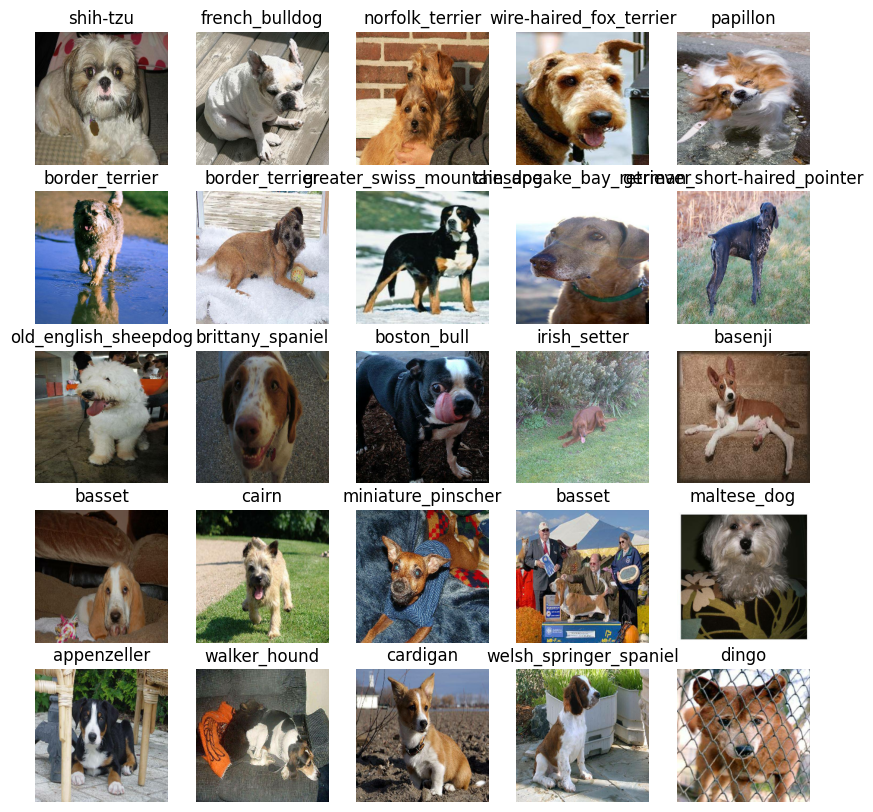

In [78]:
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

In [82]:
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


In [87]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")

  ])
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics =["accuracy"]
  )
  model.build(INPUT_SHAPE)
  return model


In [88]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [89]:
%load_ext tensorboard

In [97]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join("drive/My Drive/dog-breed-identification/logs",
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

                       )
  return tf.keras.callbacks.TensorBoard(logdir)


In [98]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3
                                                  )


In [99]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}

In [100]:
print("GPU","available(Yes!!!!!)" if tf.config.list_physical_devices("GPU") else "Not availabel")

GPU available(Yes!!!!!)


In [101]:
def train_model():
  model = create_model()
  tensorboard  = create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping]
            )
  return model


In [102]:
model = train_model()


Epoch 1/100
25/25 [==============================] - 146s 5s/step - loss: 4.5157 - accuracy: 0.1000 - val_loss: 3.2217 - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 3s 107ms/step - loss: 1.6040 - accuracy: 0.7125 - val_loss: 2.0532 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 3s 109ms/step - loss: 0.5500 - accuracy: 0.9400 - val_loss: 1.6234 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 4s 167ms/step - loss: 0.2480 - accuracy: 0.9937 - val_loss: 1.4377 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 3s 105ms/step - loss: 0.1470 - accuracy: 0.9975 - val_loss: 1.3920 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0992 - accuracy: 0.9987 - val_loss: 1.3531 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================] - 4s 158ms/step - loss: 0.0758 - accuracy: 1.0000 - val_loss: 1.3249 - val_accuracy: 0.6650


In [106]:
%tensorboard --logdir drive/My\ Drive/dog-breed-identification/logs --load_fast=false

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-09-23 18:23:27.862285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.